<a href="https://colab.research.google.com/github/jzzy-jeff/github-slideshow/blob/master/tfKrillin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [3]:
#impoort MNIST fashion dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
#Classes 
class_names = ['T_shirt/top', 'Trouser', 'Pukkover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#Explore the data
train_images.shape
#(how many, pixels(28,28))

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels
#each label in an integer 1-9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

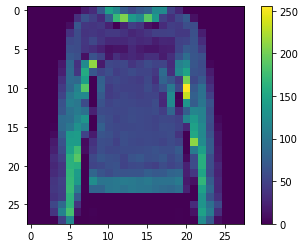

In [13]:
#Preprocess the data
plt.figure()
plt.imshow(train_images[400])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

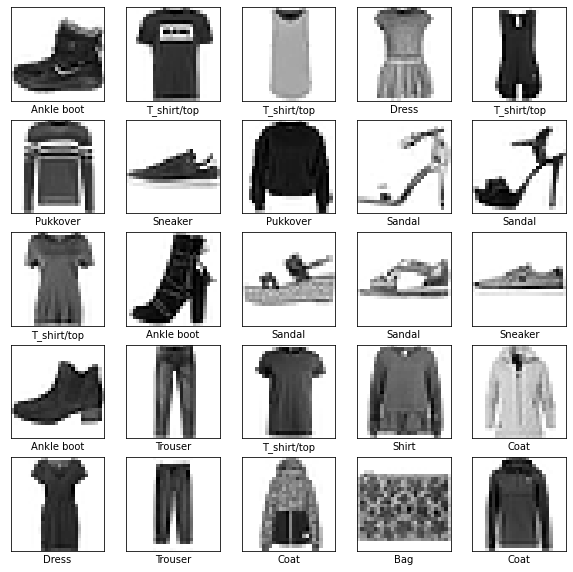

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
#Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [19]:
#Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
#Feed the monster
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6310 - accuracy: 0.7802
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3776 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3383 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3176 - accuracy: 0.8826
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2840 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2707 - accuracy: 0.8983
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2540 - accuracy: 0.9061
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2454 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [21]:
#Evaluate Destruction
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3594 - accuracy: 0.8689

Test accuracy: 0.8689000010490417


In [ ]:
#Learn to moderate Overfitting at some point....probably on the next one. 
#Respectively \_(^_^)_/

In [25]:
#See what you can break
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_images)

In [27]:
predictions[0]

array([2.66193553e-07, 4.51955383e-11, 1.05601865e-08, 9.26220038e-13,
       4.57019134e-09, 3.60188596e-02, 7.50328084e-08, 2.01304979e-03,
       2.93255056e-07, 9.61967409e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [43]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[1], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'

    plt.xlabel("() (:2.0f)% (())".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

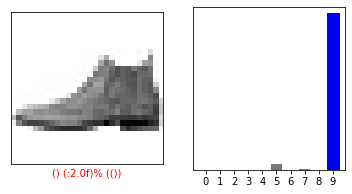

In [44]:
#Now look at the mess you made
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

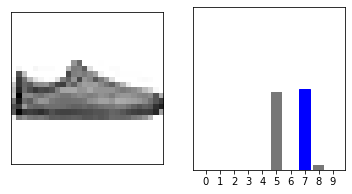

In [47]:
i = 12 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[1], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


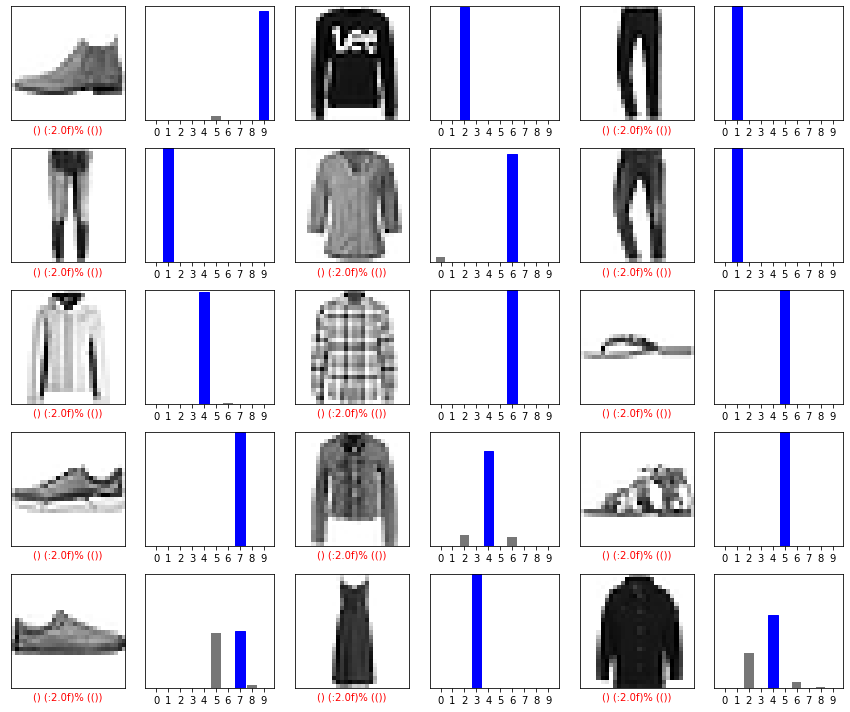

In [55]:
#plot the first X test images, their predicted labels, and the ture labels.
#colo correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [56]:
#Unleash the Beast!
#use the test dataset
img = test_images[1]

print(img.shape)

(28, 28)


In [58]:
#Add just the image to a batch 
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [59]:
#Take a wild guess G
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.16354015e-04 6.47834564e-12 9.98222053e-01 2.62681709e-07
  1.42865267e-03 1.97972281e-11 2.32689272e-04 2.71818101e-17
  6.08825101e-10 4.76626752e-15]]


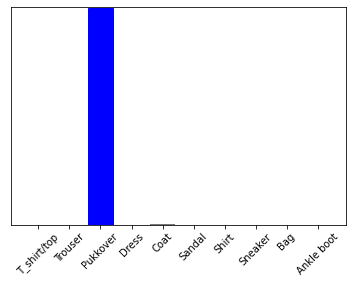

In [60]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [61]:
np.argmax(predictions_single[0])

2

In [63]:
test_labels[1]

2